Source codes for Python Machine Learning By Example 4th Edition (Packt Publishing)

Chapter 9 Recognizing Faces with Support Vector Machine

Author: Yuxi (Hayden) Liu (yuxi.liu.ece@gmail.com)

# Finding the separating boundary with SVM 

## Implementing SVM

In [1]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

X = cancer_data.data
Y = cancer_data.target

print('Input data size :', X.shape)
print('Output data size :', Y.shape)
print('Label names:', cancer_data.target_names)
n_pos = (Y == 1).sum()
n_neg = (Y == 0).sum()
print(f'{n_pos} positive samples and {n_neg} negative samples.')

Input data size : (569, 30)
Output data size : (569,)
Label names: ['malignant' 'benign']
357 positive samples and 212 negative samples.


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [3]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0, random_state=42)

In [4]:
clf.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [5]:
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

The accuracy is: 95.8%


## Scenario 4 – dealing with more than two classes 

In [6]:
from sklearn.datasets import load_wine
wine_data = load_wine()
X = wine_data.data
Y = wine_data.target

print('Input data size :', X.shape)
print('Output data size :', Y.shape)
print('Label names:', wine_data.target_names)
n_class0 = (Y == 0).sum()
n_class1 = (Y == 1).sum()
n_class2 = (Y == 2).sum()
print(f'{n_class0} class0 samples,\n{n_class1} class1 samples,\n{n_class2} class2 samples.')

Input data size : (178, 13)
Output data size : (178,)
Label names: ['class_0' 'class_1' 'class_2']
59 class0 samples,
71 class1 samples,
48 class2 samples.


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [8]:
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [9]:
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

The accuracy is: 97.8%


In [10]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Scenario 5 – solving linearly non-separable problems with kernels 

In [11]:
import numpy as np
import matplotlib.pyplot as plt


X = np.c_[# negative class
          (.3, -.8),
          (-1.5, -1),
          (-1.3, -.8),
          (-1.1, -1.3),
          (-1.2, -.3),
          (-1.3, -.5),
          (-.6, 1.1),
          (-1.4, 2.2),
          (1, 1),
          # positive class
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [-1] * 8 + [1] * 8

In [12]:
gamma_option = [1, 2, 4]

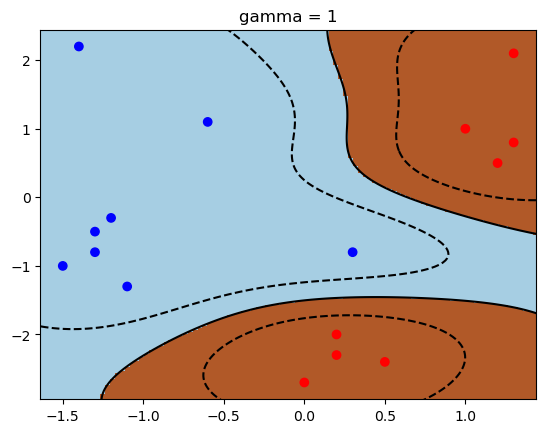

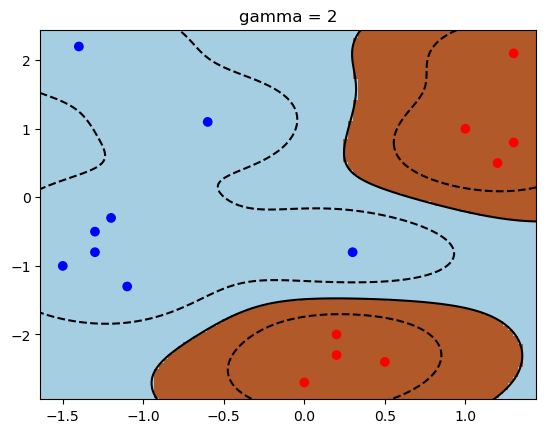

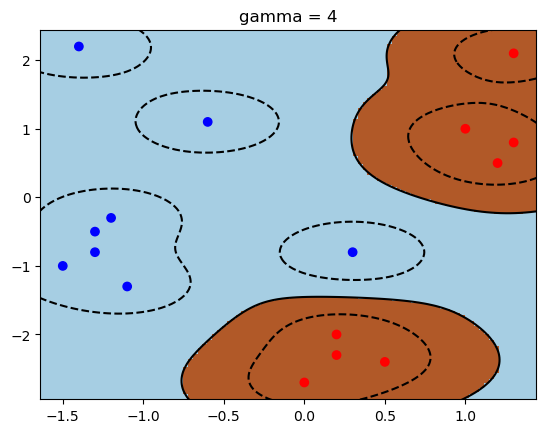

In [13]:
for i, gamma in enumerate(gamma_option, 1):
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X, Y)
    plt.scatter(X[:, 0], X[:, 1], c=['b']*8+['r']*8, zorder=10)
    plt.axis('tight')
    XX, YY = np.mgrid[-3:3:200j, -3:3:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.title('gamma = %d' % gamma)
    plt.show()

---

Readers may ignore the next cell.

In [14]:
!jupyter nbconvert --to python ch9_part1.ipynb --TemplateExporter.exclude_input_prompt=True

[NbConvertApp] Converting notebook ch9_part1.ipynb to python
[NbConvertApp] Writing 3088 bytes to ch9_part1.py
